In [1]:
from main import * 


filename = "feature_df_py.xlsx"  # df of files and factors

color_dict = {"pAD":"orange","Somatic":"blue","WASH":"lightsteelblue", "PRE":"black", "CONTROL": 'grey', "TCB2":'green', "DMT":"teal", "PSIL":"orange", "LSD":"purple", "MDL":'blue', 'I_display':'cornflowerblue'} 
saveColors(filename, color_dict) #cache colors relative to filename
#TO DO 
# add FI slope info (only max firing now) #added unchecked stats.py
# RA_AP count for FP files PRE vs POST
# rename APP for application
# loop plot all APP files w RA_AP
# loop RA_AP containing files plot getorbuildAP_MeanFig ect (pAD, somatic, unknown)




COLORS {'pAD': 'orange', 'Somatic': 'blue', 'WASH': 'lightsteelblue', 'PRE': 'black', 'CONTROL': 'grey', 'TCB2': 'green', 'DMT': 'teal', 'PSIL': 'orange', 'LSD': 'purple', 'MDL': 'blue', 'I_display': 'cornflowerblue'} SAVED TO /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py SUBCACHE


/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/feature_df.pkl
GETTING "feature_df" FROM "feature_df_py" CACHE


,folder_file,cell_id,data_type,drug,conc_uM,replication_no,APPplication_order,drug_in,drug_out,note,I_set,R_series,R_tip,cell_type,cell_subtype,sex,offset,weight,P_age,Bistable
1226,JJB230727/t54,HUM230727e,APP,TCB2,NaN,2,1,0,0,NaN,pAD_hunter,19.0,7.8,L6_HUM,PT,M,0.0,NaN,27yo,NaN


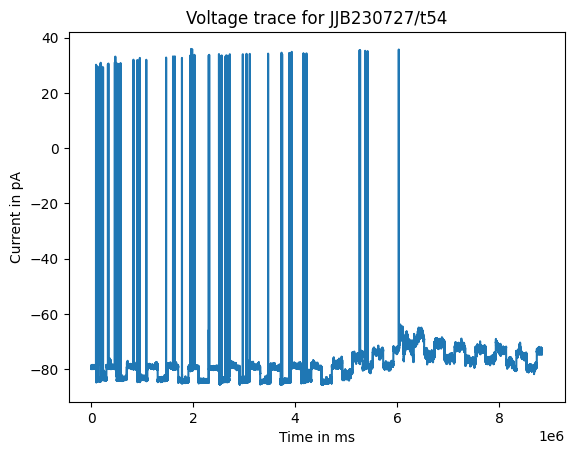

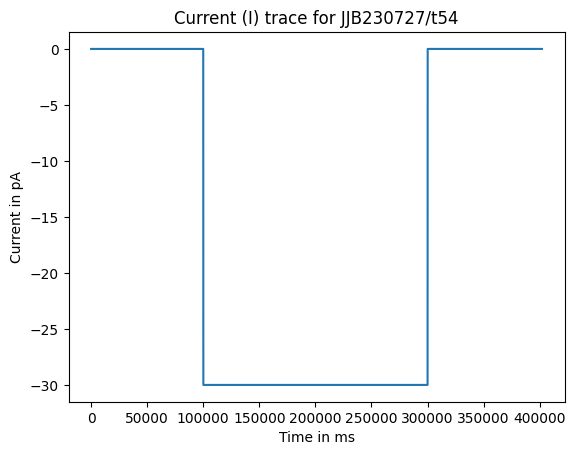

In [3]:
#check a specific file I and V plot

quick_plot_file(filename, 'JJB230727/t54', stacked=False)


# 'JJB210518/t7' artifact at base of pAD?????


#fp shit JJB230113/t12,10,11,14

# APP type file
# JJB210730/t4
# SIM210730a error message logged: RuntimeWarning: invalid value encountered in scalar divide
# SIM210730a traceback: if residuals / np.var(y_fit) <= min_fit_quality and last_I_without_APs <= rheobase_threshold < first_I_with_APs: #lower bound allows for - values

In [2]:
# FEATURE DF --> EXPANDED DF

# subselect by cell type
# df = getExpandedSubsetDf(filename, 'L5a_TLX', from_scratch=True)

# complete
df = getExpandedDf(filename)          #if cached will just get - delete cache to redo
# df[df['error']!= 'ran'][['cell_id', 'data_type','error', 'traceback', 'folder_file']]
# df[df['data_type']== 'APP''][['cell_id', 'data_type','WASH_Somatic_AP_locs', 'AP_height']]

# df.columns
df[df['data_type']=='FP'][['folder_file', 'cell_subtype']]
# df[(df['pAD'] == True) & (df['data_type'] == 'APP')][['folder_file', 'R_series', 'tau_rc', 'sag', 'pAD', 'FI_slope', 'rheobased_threshold']]

#show APP traces without AP's
# df[df['AP_locs'].apply(lambda x: isinstance(x, np.ndarray) and len(x) == 0 if isinstance(x, np.ndarray) else False)]

/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/expanded_df.pkl
BUILDING "expanded_df"
fetchig raw df
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/feature_df.pkl
BUILDING "feature_df"
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/feature_df.pkl CACHE
FP type file
JJB210406/t8
FP type file
JJB210406/t9
APs detected off current step at -70.74mV in sweep 20. 
FP type file
JJB210406/t10
AP type file
JJB210406/t11
No I injected, cannot calculate input_R.
 No I injected or no I data, taking RMP as all.
FP type file
JJB210406/t16
FP type file
JJB210406/t17
FP type file
JJB210427/t6
FP type file
JJB210427/t7
AP type file
JJB210427/t8
I injected, calculating inputR ...
I step detected, averaging V when no I injected for each sweep.
FP type file
JJB210427/t18
FP type file
JJB210427/t19
FP type file
JJB210429/t5
FP type file
JJB210429/t6
APs detected off current step at -67.84mV in sweep 17. 
AP type file
JJB210429/t7
I injected, calcul

In [5]:
# GENERATE STATS DF APP and FP 

loop_stats(filename)

# SHOW STATS DF #this is an aggregate df that stats can be done on 
df = getFPAggStats(filename)
# df = getAPPAggStats(filename) # TODO Mixed-Effects Model for Paired Data NOT t-test
df

#BUILD FP HISTOGRAMS # student t test paired
# build_FP_figs(filename, compensation_variance=0.4) #also will getOrBuild insufficient_data_tracking =getOrBuildDataTracking(filename)
# build_APP_histogram_figures(filename)



/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/expanded_df.pkl
GETTING "expanded_df" FROM "feature_df_py" CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_agg_stats.pkl
GETTING "FP_agg_stats" FROM "feature_df_py" CACHE


KeyError: 'cell_subtype'

In [2]:
#APPLICATION TRACE PLOTTING
#FIX ME: allow for second aplication plotting also 


# getorbuildApplicationFig(filename, 'SIM230713a', from_scratch=True) #cell_df_or_id

import numpy as np
import pandas as pd
#loop over all AP files and build from scratch
# loopBuildAplicationFigs(filename) #FIX ME: run out of active memeory

# plot_all_FI_curves(feature_df,  color_dict)  # generates PDF with all FI curves for single cell labed with drug and aplication order #### MAKE HZ NOT APs per sweep also isnt it in pA not nA??
# plot_FI_AP_curves(feature_df) #generated PDF with FI-AP for each cell

def APP_loop_plotter(filename_or_df, getorbuild_plotter_function, from_scratch=True ):

    if not isinstance(filename_or_df, pd.DataFrame):
        expanded_df = getExpandedDf(filename) 
    else:
        filename_or_df=expanded_df
    
    for cell_id in expanded_df['cell_id'].unique(): #loop over all unique cell_ids 
        cell_df = getCellDf(expanded_df, cell_id, data_type = 'APP')
        getorbuild_plotter_function(filename, cell_df, from_scratch=from_scratch) #check use for second aplications in AP_MEan ect

    return

APP_loop_plotter(filename, getorbuildApplicationFig, from_scratch=True)

/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/expanded_df.pkl
GETTING "expanded_df" FROM "feature_df_py" CACHE
using suplied expanded df
BUILDING "CTG210406a Application 1 Figure"
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210406a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210406a_application_1.png
using suplied expanded df
BUILDING "CTG210427a Application 1 Figure"
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210427a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210427a_application_1.png
using suplied expanded df
BUILDING "CTG210429a Application 1 Figure"
Fewer than 2 APs with voltage threshold > -65mV.
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210429a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210429a_application_1.png
using suplied expanded df
BUILDING "CTG

: 

In [3]:
#Action Potential Investigation (AP)

#EXAMPLE USE
# cell_type_expanded_df = getExpandedSubsetDf(filename, 'L6b_DRD', from_scratch=True)

cell_df = getCellDf(getExpandedDf(filename) , 'TLX210328a', data_type='APP')

getorbuildAP_MeanFig(filename, cell_df, from_scratch=True) 
# getorbuildAP_HistogramFig(filename, cell_df, from_scratch=True) 
# getorbuildAP_PhasePlotFig(filename, cell_df, from_scratch=True) 
# getorbuildAP_PCAFig(filename, cell_df, from_scratch=True) 
# getorbuildApplicationFig(filename, 'TLX210328a', from_scratch=True)




/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/expanded_df.pkl
GETTING "expanded_df" FROM "feature_df_py" CACHE
using suplied expanded df
BUILDING "TLX210328a Mean APs Figure"


NameError: name 'V' is not defined

In [3]:
#this function is dependant on values from feature_df_expanded
#this will generate all plots that could also be gotten by getorbuildHistogram(finename, identifier) #FIX ME
loop_stats(filename)
#RuntimeWarning: Mean of empty slice. #FIX ME

/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/expanded_df.pkl
GETTING "expanded_df" FROM "feature_df_py" CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl
BUILDING "FP_stats"
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl
GETTING "FP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl
GETTING "FP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl
GETTING "FP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl
GETTING "FP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl
GETTING "FP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl
GETTING "FP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl
GETTING "FP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/fea

/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),
/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),
/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/module/stats.py:132: RuntimeWarning: Mean of empty slice
  "value": np.nanmean(row[list_col]),


CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl
GETTING "APP_stats" FROM "feature_df_py" CACHE
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/APP_stats.pkl CACHE


,folder_file,cell_id,data_type,drug,conc_uM,replication_no,application_order,drug_in,drug_out,note,...,inputR_PRE,error,inputR_WASH,APP_Somatic_AP_locs,WASH_pAD_Possible_AP_locs,AP_dvdt_max,tau_rc,sag,AP_height,voltage_threshold
1774,JJB230908/t7,TLX230908a,AP,PSIL_CNQX_AP5,40.0,1,1,22.0,37.0,NaN,...,"[nan, nan, 100702095.0317383, 98363685.6079101...",ran,"[223593235.01586917, 224287748.336792, 2206979...",[],[],NaN,NaN,NaN,NaN,NaN
905,JJB230509/t8,CBL230509a,AP,TCB2,NaN,1,1,21.0,35.0,NaN,...,"[nan, nan, 276636600.49438477, 255208110.80932...",ran,"[217913246.15478516, 196788215.63720706, 15425...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,JJB230509/t15,CBL230509b,AP,TCB2,NaN,1,1,9.0,22.0,NaN,...,"[nan, nan, 132864379.8828125, 130225753.784179...",ran,"[227397632.59887695, 153590106.96411133, 12169...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,JJB230509/t11,CBL230509b,FP,PRE,NaN,1,0,NaN,NaN,NaN,...,NaN,ran,NaN,NaN,NaN,"[188.71875762939453, 186.86248779296875, 184.6...","[27.93805166892663, -60.10617, 20.0, -62.940094]","[0.06175126, -91.301216, -300.0, -63.698795]","[79.942505, 80.65406, 80.685, 80.31375, 82.200...","[-37.125, -37.58906, -37.094063, -37.40344, -3..."
907,JJB230509/t12,CBL230509b,FP,PRE,NaN,2,0,NaN,NaN,NaN,...,NaN,ran,NaN,NaN,NaN,"[198.46406936645508, 189.1828155517578, 197.53...","[44.373841628544035, -52.539864, 60.0, -61.158...","[0.039608095, -93.277275, -300.0, -63.950195]","[78.24094, 78.39563, 79.35469, 79.07625, 78.24...","[-35.547188, -35.578125, -36.3825, -36.784687,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,JJB230301/t19,DRD230301a,FP_AP,WASH,NaN,14,1,NaN,NaN,NaN,...,NaN,ran,NaN,NaN,NaN,"[135.1968765258789, 128.08124542236328, 125.14...","[15.76404983504405, -67.848755, 80.0, -87.8429]","[0.042812403, -118.1878, -140.0, -89.850204]","[74.86875, 75.580315, 73.84781, 74.65219, 75.8...","[-57.915, -55.285313, -55.470936, -54.759377, ..."
725,JJB230301/t20,DRD230301a,FP_AP,WASH,NaN,15,1,NaN,NaN,NaN,...,NaN,ran,NaN,NaN,NaN,"[139.37342643737793, 123.5953140258789, 119.26...","[15.90159284496637, -66.213234, 80.0, -87.47038]","[0.11365343, -115.74091, -140.0, -88.95289]","[75.796875, 75.08531, 74.28094, 74.37375, 73.4...","[-58.471874, -56.33719, -55.1925, -56.244373, ..."
726,JJB230301/t21,DRD230301a,FP_AP,WASH,NaN,16,1,NaN,NaN,*offsetadj,...,NaN,ran,NaN,NaN,NaN,"[136.58906936645508, 124.98749732971191, 121.1...","[17.323881488208237, -57.25459, 80.0, -77.414566]","[0.047349356, -107.10061, -140.0, -77.539185]","[75.14719, 75.42563, 74.65219, 73.72406, 73.25...","[-47.860313, -45.91125, -46.220627, -45.632812..."
1292,JJB230801/t23,DRD230801b,pAD,TCB2_CNQX_AP5,NaN,1,1,NaN,NaN,NaN,...,NaN,ran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
